<a href="https://colab.research.google.com/github/Coyote-Schmoyote/face-detection-dlib/blob/main/face_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection with dlib library
## Pre-trained models
Transfer learning allows us to use pre-trained models that were developed and trained by other people. In other words, instead of building a machine learning model from scratch to solve a problem, we can use a model developed by someone else trying to solve a similar problem. A pre-trained model may not be perfect for our goal, but it saves a lot of time and effort. 

In this notebok, we will use a combination of  open-source dlib machine learning library and OpenCV for face detection.

## Dlib
According to their github page (https://github.com/davisking/dlib)、dlib is a "toolkit for making real world machine learning and data analysis applications in C++". The dlib library is created and maintained by Davis King, ans is a popular library used by people in both industry and academia in robotics, embedded devices, computer vision, and other related fields. Originally, all the code in dlib library is written in C++, but it has easy to use Python wrappers. Dlib library provides two functions for face detection:
1. HOG (Histogram of Oriented Gradients) + Linear SVM
> Doesn‘t accept any parameters, and returns a pre-trained HOG + Linear SVM face detector included in the dlib library.
2. MMOD CNN
> Accepts `modelPath` parameter, which is the path to the pre-trained human face detector file.

## OpenCV
OpenCV (open Source Computer Vision Library) is a library that provides programming functions mostly for real-time computer vision problems. It mostly focuses on image processing, video capture, and analysis, including face and object detection. 

## Runtime CPU, GPU, and TPU
**Central Processing Unit (CPU)** is the core processor that exists in all smart devices. It is a general-purpose processor designed with a few powerful cores and a cache memory that allows it to run several types of software simultaneously. The major manufacturers of CPUs are intel, Samsung, Apple, Qualcomm, Hewlett-Packard, IBM, etc.

Use CPU when:
* Prototypes that require flexibility
* Training simple models fast
* Training small models with small batch sizes
* Models with limited input/output (I/O)

**Graphics Processing Unit (GPU)** is a specialized processor that works as an accelerator with the CPU. Unlike CPU, it has thousands of cores that break down complex problems into thousands or even millions of separate tasks and complete them in parallel. GPU is essential to deep learning because of its ability to accelerate large matrix operations and perform mixed-precision matrix calculations in one operation. While GPU can process thousands of tasks simultaneously, they are typically less efficient with neural networks compared to TPU.
The major manufacturers of GPU are Nvidia, Broadcom, and Imagination.

Use GPU when:
* Training models that are difficult to change
* Training models with numerous custom TensorFlow operations
* Training medium or large size models with bigger batch sizes
* Rendering graphical tasks

**Tensor Processing Units (TPU)** are application-specific integrated circuits, designed by Google in 2015, and made publicly available since 2018. TPUs are available as a cloud, are very fast at performing vector and matrix computations, and accelerate neural network machine learning on TensorFlow. 

Use TPU when:
* Training models using mostly matrix computations
* Training models that require weeks or months to complete
* Training huge models with very large batch sizes.

For this task, because we are dealing with image processing, let‘s switch our runtime type to GPU.

**CUDA**

In [2]:
# download the libraries
! pip install opencv-contrib-python
! pip install dlib
! pip install opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [3]:
# import packages
import dlib
import matplotlib.pyplot as plt

In [6]:
#check the dlib version
dlib.__version__

'19.18.0'

## Bz2 files
The pre-trained machine learning models in dlib library come archived in `.bz2` files. `.bz2` file is a TAR archive compressed with a Burrows-Wheeler(BZ2) compression algorithm combined with Run-Length Encoding (RLE) for better compression. It is often used to compress software packages on Unix-based operating systems, such as Linux. Compared to `.zip`, `.bz2` contain only one, very efficiently compressed file.

The easiest way to decompress a bz2 file is by running the following code in the command line:
`bzip2 -d filename.bz2`
Howeverm thiscommand will not preserve the original archive file. To keep both, we need to add the `-k` option:
`bzip2 -dk filename.bz2`

After decompressing `.bz2` files from dlib library, we got 2 `.dat` files: `shape_predictor_5_face_landmarks.dat` and `dlib_face_recognition_resnet_model_v1.dat`. Let‘s save the paths to these files in variables.

In [4]:
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("drive/MyDrive/ml-projects/shape_predictor_5_face_landmarks.dat")
model = dlib.face_recognition_model_v1("drive/MyDrive/ml-projects/dlib_face_recognition_resnet_model_v1.dat")

## Import images
For the purpose of this project, we will use a *5 Celebrity Faces* Kaggle dataset (https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset). The dataset includes 14-20 photos of 5 celebrities: Ben Afflek, Elton John, jerry Seinfeld, Madonna, and Mindy Kaling.
For this experiment, we will use two images of Jerry Seinfeld. 

In [5]:
#save image paths
img1_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/1.jpg"
img2_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/2.jpg"

In [6]:
# use dlib load_rgb_image method to uploas the images
img1 = dlib.load_rgb_image(img1_path)
img2 = dlib.load_rgb_image(img2_path)

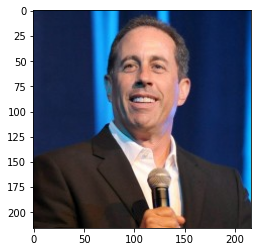

In [7]:
# display images with matplotlib pyplot
plt.imshow(img1);

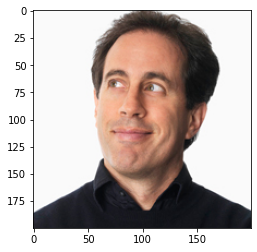

In [ ]:
plt.imshow(img2);

In [ ]:
img1

array([[[ 26,  42,  78],
        [ 27,  43,  79],
        [ 26,  42,  76],
        ...,
        [  1,  41, 102],
        [  4,  48, 113],
        [  7,  54, 122]],

       [[ 25,  41,  77],
        [ 26,  42,  78],
        [ 26,  42,  76],
        ...,
        [  1,  41, 102],
        [  5,  49, 114],
        [  7,  54, 122]],

       [[ 26,  40,  77],
        [ 26,  40,  77],
        [ 27,  41,  76],
        ...,
        [  2,  42, 103],
        [  5,  48, 116],
        [  8,  55, 125]],

       ...,

       [[ 33,  24,  19],
        [ 33,  24,  19],
        [ 34,  25,  20],
        ...,
        [ 42,  41,  39],
        [ 40,  39,  37],
        [ 39,  38,  36]],

       [[ 23,  14,   9],
        [ 25,  16,  11],
        [ 26,  17,  12],
        ...,
        [ 42,  41,  39],
        [ 41,  40,  38],
        [ 39,  38,  36]],

       [[ 24,  15,  10],
        [ 25,  16,  11],
        [ 28,  19,  14],
        ...,
        [ 42,  41,  39],
        [ 41,  40,  38],
        [ 40,  39,  37]]

In [ ]:
img1_detected = detector(img1, 1)
img2_detected = detector(img2, 1)

In [ ]:
# how many faces detected
len(img1_detected)

1

In [ ]:
img1_shape = shape_predictor(img1, img1_detected[0])
img2_shape = shape_predictor(img2, img2_detected[0])

In [ ]:
img1_aligned = dlib.get_face_chip(img1, img1_shape)
img2_aligned = dlib.get_face_chip(img2, img2_shape)

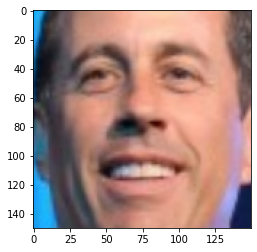

In [ ]:
# visualize
plt.imshow(img1_aligned);

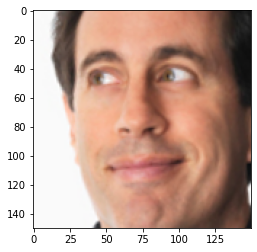

In [ ]:
plt.imshow(img2_aligned);

## MMOD face detector